# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forest) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (checking missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [4]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


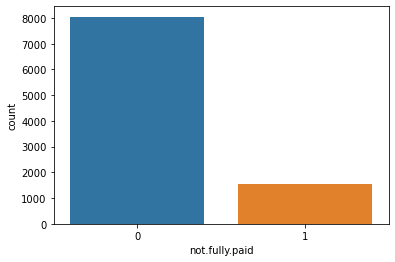

In [5]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

Show all your work below

# EDA

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9581.000000,9581.000000,9580.000000,9580.000000,9581.000000,9581.000000,9581.000000,9.581000e+03,9581.000000,9581.000000,9581.00000,9581.000000,9581.000000
mean,0.805031,0.122643,319.075737,10.932306,12.605600,710.802735,4560.684919,1.691027e+04,46.790281,1.577602,0.16397,0.062102,0.160004
std,0.396198,0.026843,207.051846,0.614887,6.883162,38.675211,2496.543715,3.375155e+04,29.014286,2.199913,0.54633,0.262088,0.366629
min,0.000000,0.060000,15.670000,7.547502,0.000000,50.000000,178.958333,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.220000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.929887,12.660000,707.000000,4139.958333,8.590000e+03,46.300000,1.000000,0.00000,0.000000,0.000000
75%,1.000000,0.140700,432.487500,11.294769,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.00000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,999.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.00000,5.000000,1.000000


In [7]:
df.shape

(9581, 14)

In [8]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [9]:
missing_installments = df[np.isnan(df['installment'])]
missing_installments

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
14,1,debt_consolidation,0.1324,NaN,NaN,9.16,666,4298.0,5122,18.2,2,1,0,0


In [10]:
missing_log_annual_inc = df[np.isnan(df['log.annual.inc'])]
missing_log_annual_inc

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
14,1,debt_consolidation,0.1324,NaN,NaN,9.16,666,4298.0,5122,18.2,2,1,0,0


Only one observation is missing data, we can just drop it

In [11]:
df = df.dropna()
df.shape

(9580, 14)

In [12]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

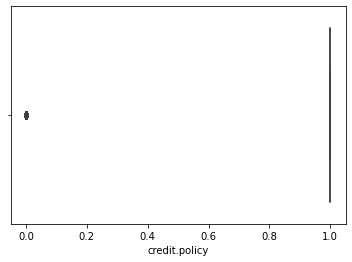

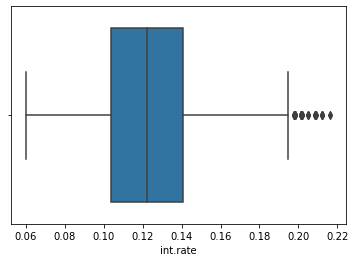

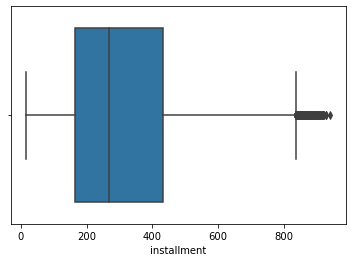

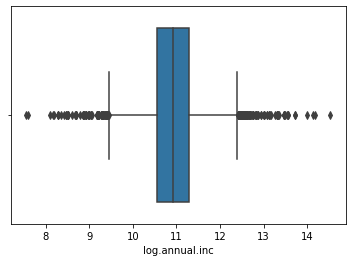

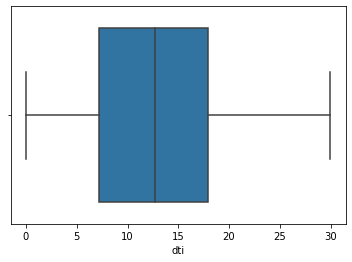

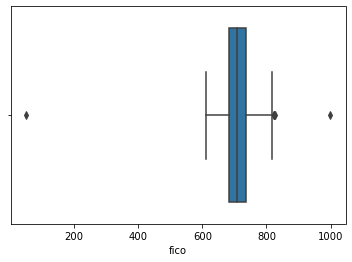

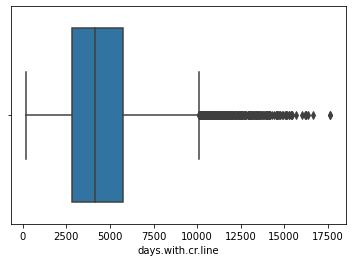

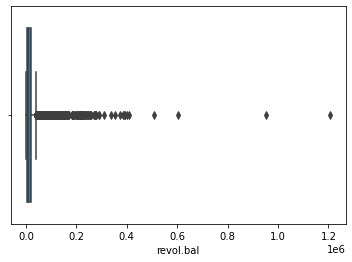

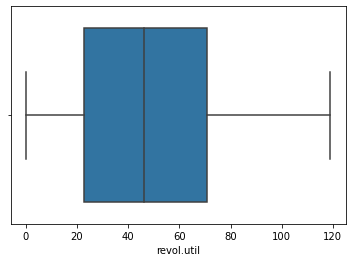

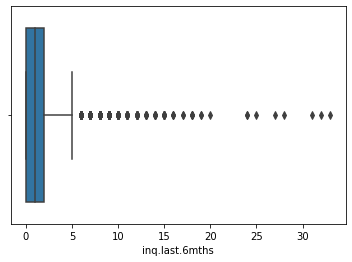

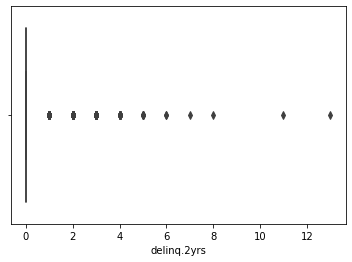

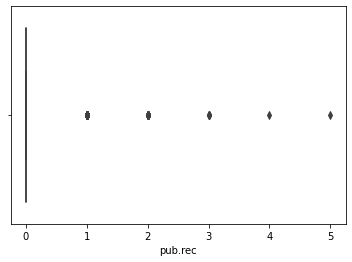

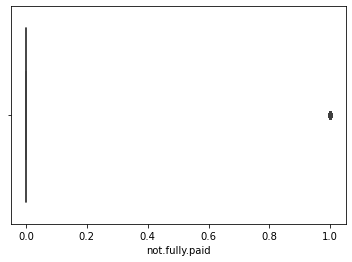

In [13]:
col_names = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', \
             'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']
for col_name in col_names:
    plt.figure()
    sns.boxplot(x=df[col_name])

### Handling Outliers / Data Wrangling

In [14]:
test = df[df['log.annual.inc'] > 13.6]
test.shape

df = df.query('8 < `log.annual.inc` < 13.6')
df.shape

(9572, 14)

In [15]:
df = df.query('200 < fico < 900')
df.shape

(9570, 14)

In [16]:
df = df.query('`revol.bal` < 300000')
df.shape

(9557, 14)

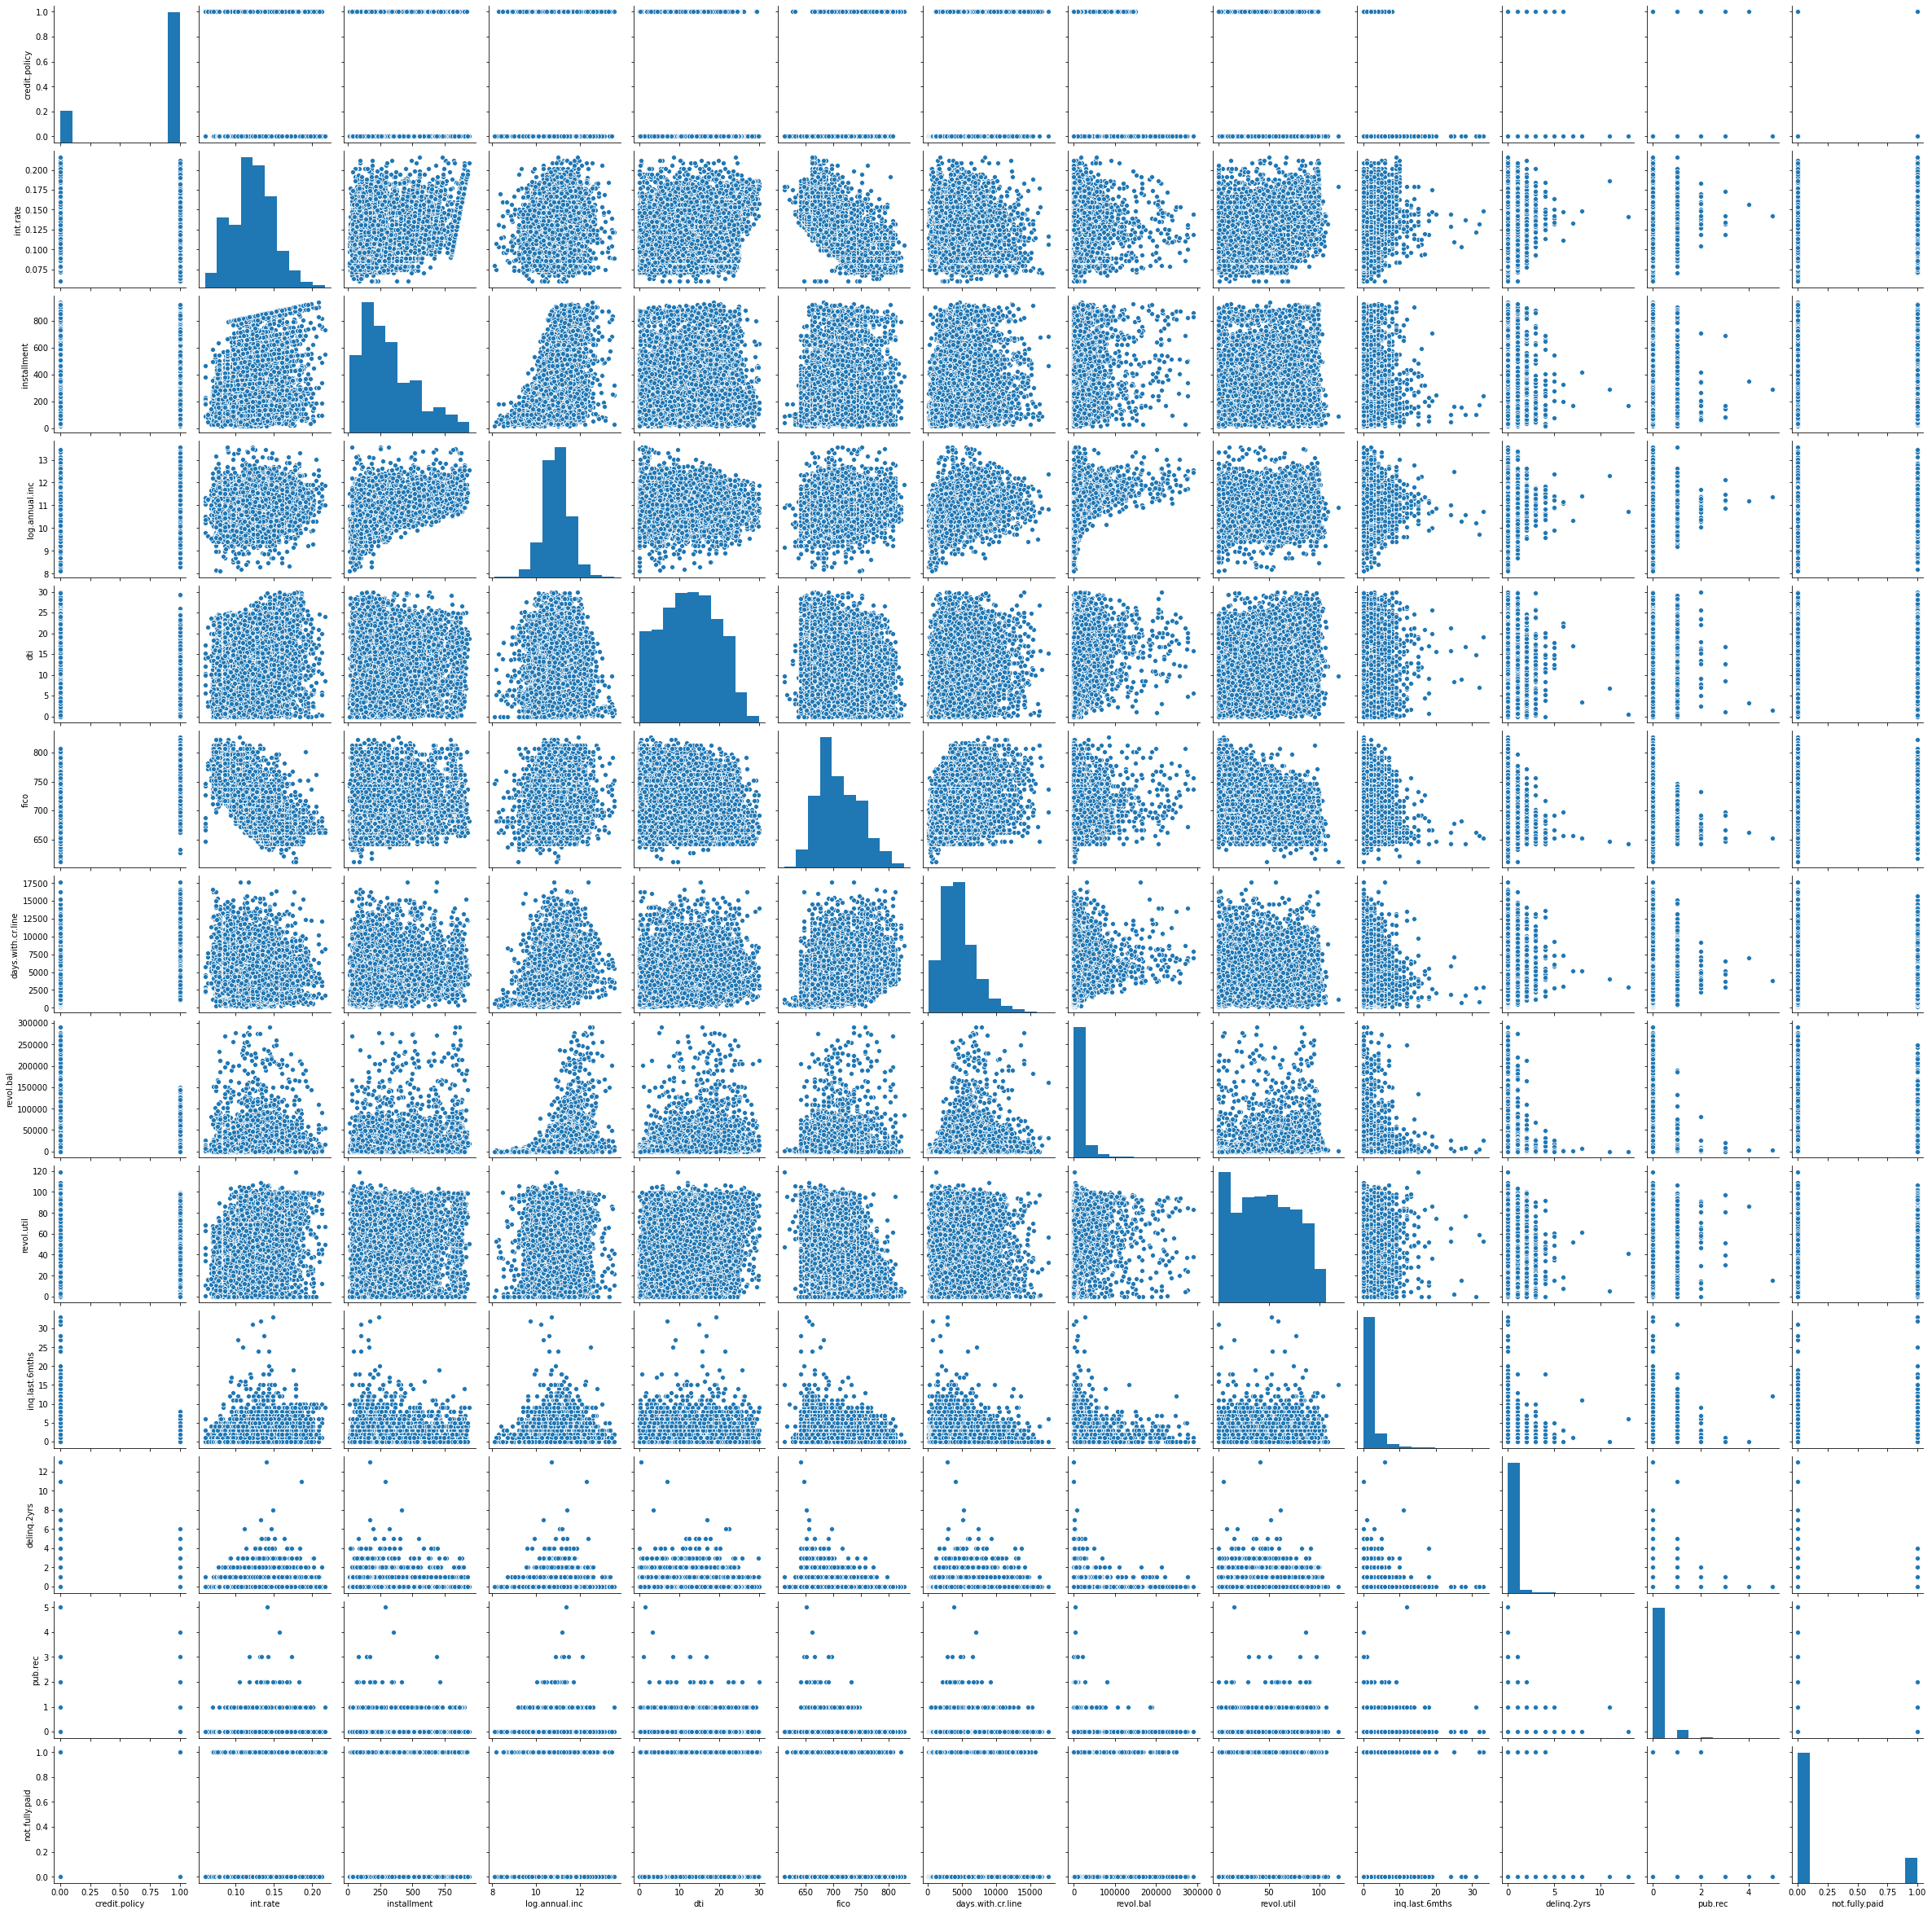

In [17]:
sns.pairplot(data=df)

In [18]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.292968,0.062698,0.038813,-0.089855,0.348674,0.102396,-0.186157,-0.102739,-0.536446,-0.077065,-0.054335,-0.156160
int.rate,-0.292968,1.000000,0.275158,0.057277,0.219279,-0.714970,-0.125439,0.091307,0.464284,0.202590,0.156344,0.098471,0.159702
installment,0.062698,0.275158,1.000000,0.449709,0.048986,0.086089,0.180818,0.255191,0.080832,-0.011278,-0.004318,-0.032159,0.047600
log.annual.inc,0.038813,0.057277,0.449709,1.000000,-0.051072,0.112912,0.335847,0.406951,0.056196,0.029515,0.030802,0.017014,-0.034489
dti,-0.089855,0.219279,0.048986,-0.051072,1.000000,-0.241044,0.059770,0.229833,0.336561,0.029820,-0.021814,0.006276,0.036515
fico,0.348674,-0.714970,0.086089,0.112912,-0.241044,1.000000,0.263944,-0.014112,-0.541183,-0.185134,-0.216446,-0.147635,-0.150357
days.with.cr.line,0.102396,-0.125439,0.180818,0.335847,0.059770,0.263944,1.000000,0.255017,-0.024409,-0.042158,0.081404,0.072175,-0.031902
revol.bal,-0.186157,0.091307,0.255191,0.406951,0.229833,-0.014112,0.255017,1.000000,0.240076,0.008038,-0.037121,-0.041935,0.045003
revol.util,-0.102739,0.464284,0.080832,0.056196,0.336561,-0.541183,-0.024409,0.240076,1.000000,-0.013829,-0.042454,0.066642,0.082882
inq.last.6mths,-0.536446,0.202590,-0.011278,0.029515,0.029820,-0.185134,-0.042158,0.008038,-0.013829,1.000000,0.021219,0.072493,0.149256


Interest rates have the largest correlation with paying in full.

### Dummify 'purpose'

In [19]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

There is no immediate need to combine any of these categories and there are only a few of them so we will just dummify as is.

In [20]:
purpose = pd.get_dummies(df['purpose'], drop_first=True)
df = df.drop('purpose', axis=1)
df = pd.concat([df, purpose], axis=1)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9577,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9578,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9579,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


# Normalization

In theory, we should normalize after partitioning to avoid data leakage but in practice, it's easier to normalize first.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [23]:
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.806111,0.400408,0.327802,0.517268,0.420922,0.459714,0.250723,0.055975,0.393196,1.576331,0.163964,0.062153,0.159674,0.131841,0.413728,0.035890,0.065711,0.045516,0.064246
std,0.395364,0.171523,0.223564,0.110814,0.229601,0.176583,0.142751,0.092434,0.243716,2.200108,0.546696,0.262223,0.366322,0.338335,0.492527,0.186025,0.247789,0.208445,0.245204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.280691,0.160178,0.449509,0.240988,0.325581,0.151251,0.010970,0.189916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.397059,0.273973,0.516755,0.422897,0.441860,0.225818,0.029524,0.389076,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.515985,0.449598,0.583337,0.599132,0.581395,0.317908,0.062623,0.595798,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.376598,0.879888,0.594420,0.650200,0.581395,0.312754,0.099380,0.437815,0,0,0,0,0,1,0,0,0,0
1,1,0.301151,0.229916,0.545336,0.476969,0.441860,0.147818,0.115805,0.644538,0,0,0,0,1,0,0,0,0,0
2,1,0.484015,0.379883,0.415674,0.388184,0.325581,0.259495,0.012093,0.215126,1,0,0,0,0,1,0,0,0,0
3,1,0.260870,0.158653,0.594420,0.270360,0.465116,0.144379,0.115957,0.615126,1,0,0,0,0,1,0,0,0,0
4,1,0.528133,0.094378,0.585149,0.499666,0.255814,0.222613,0.016326,0.331933,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,0,0.550512,0.355977,0.746349,0.346796,0.279070,0.589602,0.741790,0.689916,2,0,0,1,0,0,0,0,0,0
9577,0,0.417519,0.261804,0.556263,0.007009,0.511628,0.240596,0.000634,0.009244,5,0,0,1,0,0,0,0,0,0
9578,0,0.301151,0.088851,0.456503,0.436916,0.348837,0.187337,0.034566,0.696639,8,0,0,1,0,1,0,0,0,0
9579,0,0.639386,0.363354,0.497331,0.640187,0.372093,0.092838,0.000000,0.026891,5,0,0,1,0,0,0,1,0,0


# Partitioning Into Training Test Splits

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('not.fully.paid', axis=1), df['not.fully.paid'],
                                                    test_size=0.2, random_state=0)

# Testing Different Models

In [31]:
def evaluate_mod(mod, X_train, Y_train, X_test, Y_test):
    mod.fit(X_train, Y_train)
    Y_pred = mod.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print("accuracy score: ", accuracy_score(Y_test, Y_pred))

In [32]:
mod = RandomForestClassifier(n_estimators=100)
evaluate_mod(mod, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1594
           1       0.33      0.02      0.04       318

    accuracy                           0.83      1912
   macro avg       0.58      0.51      0.47      1912
weighted avg       0.75      0.83      0.76      1912

accuracy score:  0.8300209205020921


In [33]:
mod = LogisticRegression()
evaluate_mod(mod, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1594
           1       0.58      0.03      0.07       318

    accuracy                           0.84      1912
   macro avg       0.71      0.51      0.49      1912
weighted avg       0.79      0.84      0.77      1912

accuracy score:  0.8352510460251046


In [34]:
from sklearn.naive_bayes import GaussianNB

mod = GaussianNB()
evaluate_mod(mod, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1594
           1       0.32      0.33      0.33       318

    accuracy                           0.77      1912
   macro avg       0.59      0.60      0.60      1912
weighted avg       0.78      0.77      0.78      1912

accuracy score:  0.774581589958159


It appears that Naive Bayes performs the best (according to the f1-score).

# Cross Validation

In [29]:
import random 

def fit_and_evaluate(model, X_train, Y_train, X_test, Y_test):
    
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    #print(classification_report(Y_test, Y_pred))
    #print(accuracy_score(Y_test, Y_pred))
    
    return classification_report(Y_test, Y_pred, output_dict=True)

# comparison of f1 scores
def cross_validate(mod, X, Y, iterations):
    f1_0 = []
    f1_1 = []
    
    for i in range(iterations):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
        
        report = fit_and_evaluate(mod, X_train, Y_train, X_test, Y_test)
        f1_0.append(report['0']['f1-score']) 
        f1_1.append(report['1']['f1-score'])
    
    graph_metrics(f1_0, f1_1)
        
def graph_metrics(line1, line2):
    x_axis = range(len(line1))
    
    fig = plt.figure()
    
    plt.plot(x_axis, line1, color='blue', label="f1_0")
    plt.plot(x_axis, line2, color='red', label="f1_1")
    
    plt.xlabel('Iteration')
    plt.ylabel('f1 score')
    
    plt.legend()
    plt.show()

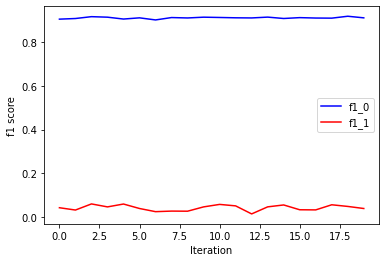

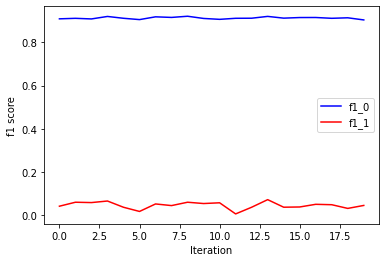

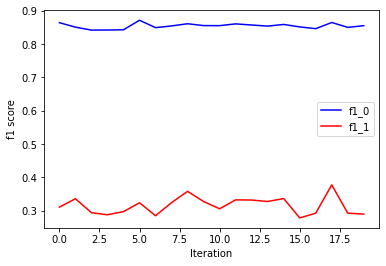

In [30]:
cross_validate(RandomForestClassifier(n_estimators=100), df.drop('not.fully.paid', axis=1), df['not.fully.paid'], 20)
cross_validate(LogisticRegression(), df.drop('not.fully.paid', axis=1), df['not.fully.paid'], 20)
cross_validate(GaussianNB(), df.drop('not.fully.paid', axis=1), df['not.fully.paid'], 20)

We can see that these metrics are relatively stable so they pass validation. The f1 score for predicting 0 is more flat due to it having observed it many more times (the rows with 1 were far fewer in number, leading to instability in predictions).

# Postmortem

Empirically, the Naive Bayes model performed the best according to the F1 scores, particularly when predicting partial payments ('not.fully.paid' = 1).

If we wanted better models, we could get more data but in the real world, this typically translates to more funding required to acquire said data. This can be costly.

The data was cleaned hastily; there is most certainly many more outliers or things to consider.
There was only one row that had missingness; it was not worth it to impute - it was dropped.

However, for the data that we considered outliers, we simply removed them. This cut down on a fraction of the rows. It might have been worthwhile to investigate if the data should have been imputed or required corrections especially if many rows predict 1 (i.e., the payment will not be paid in full).

To make the model as optimal as we can make it, it would also require insight into the matter. I do not profess to be a professional on loans and therefore, I likely lack the insight to "squeeze every last bit out of the dataset."